## Modeling

In this notebook I'm going to perform model training and validation on transformed data 

In [109]:
import pickle
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [110]:
with open(Path("../data/data_transformed.pkl"), "rb") as f:
    data = pickle.load(f)

data.head()


,work_year,experience_level,salary,remote_ratio,company_size,job_title_3D Computer Vision Researcher,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,...,employee_residence_US,company_location_CA,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_IN,company_location_Other,company_location_US
0,0.0,2.0,70000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,260000,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,3.0,85000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,2.0,20000,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,3.0,150000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


0      6000000
1      4900000
2      4450000
3      4000000
4      3000000
        ...   
596       9272
597       8760
598       8000
599       4000
600       4000
Name: salary, Length: 601, dtype: int64


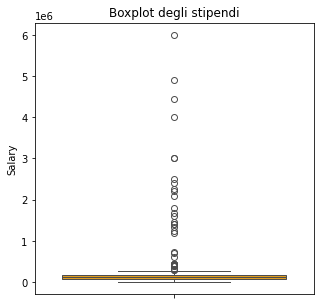

In [140]:
print(data['salary'].sort_values(ascending=False))

plt.figure(figsize=(5, 5))
sns.boxplot(y=data['salary'], color="orange")
plt.ylabel("Salary")
plt.title("Boxplot degli stipendi")
plt.show()

In [145]:
data = data.sort_values(by='salary', ascending=False).iloc[1:].reset_index(drop=True)

In [146]:
data['salary'].sort_values(ascending=False)

0      3000000
1      2500000
2      2400000
3      2250000
4      2200000
        ...   
591       9272
592       8760
593       8000
594       4000
595       4000
Name: salary, Length: 596, dtype: int64

In [147]:
# separate dataset into train and test

X = data.drop(columns=['salary'])
y = data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((476, 73), (120, 73))

In [114]:
def evaluate_regression(y_true, y_pred):
    """
    MAE, MSE and RMSE calculation

    parameters:
    - y_true: true value
    - y_pred: predicted value
    
    returned value:
    - dict with all metrics calculated
    """
    
    metrics = {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred, squared=False)
    }
    
    return metrics

In [115]:
def plot_predictions(y_true, y_pred, model_name="Modello"):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(y_true)), y_true, label="Valori Reali", color='blue', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, label="Predizioni", color='red', alpha=0.6)
    plt.xlabel("Osservazioni")
    plt.ylabel("Valore Target")
    plt.title(f"Predizioni vs Reali (Ordinato) - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),  
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "Support Vector Regressor": SVR(),
    "AdaBoost Regressor": AdaBoostRegressor()
}


In [117]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    model_list = []
    mse_list = []

    for i in range(len(list(models))):
        model_name = list(models.keys())[i]
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        metrics_train = evaluate_regression(y_train ,y_train_pred)

        # Test set performance
        metrics_test = evaluate_regression(y_test, y_test_pred)

        plot_predictions(y_test, y_test_pred, model_name=model_name)

        model_list.append(model_name)
        mse_list.append(metrics_test['MAE'])

        print(f'{model_name} Model performance for Training set')
        print("- MAE (Mean Absolute Error): {:.4f}".format(metrics_train['MAE']))
        print('- MSE (Mean Squared Error): {:.4f}'.format(metrics_train['MSE'])) 
        print('- RMSE (Root Mean Squared Error): {:.4f}'.format(metrics_train['RMSE']))
        
        print('----------------------------------')

        print(f'{model_name} Model performance for Test set')
        print("- MAE (Mean Absolute Error): {:.4f}".format(metrics_test['MAE']))
        print('- MSE (Mean Squared Error): {:.4f}'.format(metrics_test['MSE'])) 
        print('- RMSE (Root Mean Squared Error): {:.4f}'.format(metrics_test['RMSE']))
        
        print('='*35)

        print('\n')
        
    report=pd.DataFrame(list(zip(model_list, mse_list)), columns=['Model Name', 'MAE']).sort_values(by=['MAE'], ascending=True)
        
    return report

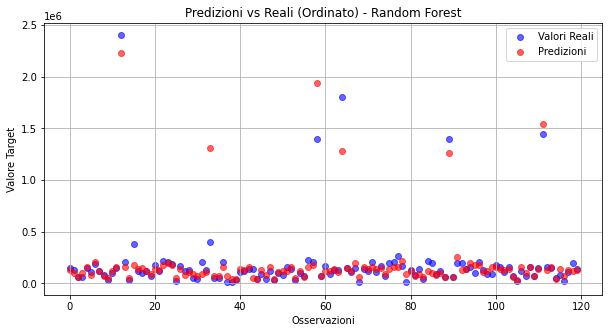

Random Forest Model performance for Training set
- MAE (Mean Absolute Error): 31545.4059
- MSE (Mean Squared Error): 5067344710.5485
- RMSE (Root Mean Squared Error): 71185.2844
----------------------------------
Random Forest Model performance for Test set
- MAE (Mean Absolute Error): 49232.4729
- MSE (Mean Squared Error): 13770456102.3740
- RMSE (Root Mean Squared Error): 117347.5867




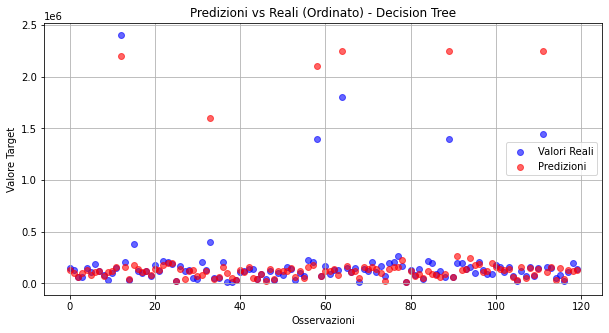

Decision Tree Model performance for Training set
- MAE (Mean Absolute Error): 11147.8088
- MSE (Mean Squared Error): 492571658.3402
- RMSE (Root Mean Squared Error): 22193.9554
----------------------------------
Decision Tree Model performance for Test set
- MAE (Mean Absolute Error): 66811.8459
- MSE (Mean Squared Error): 31525220185.9692
- RMSE (Root Mean Squared Error): 177553.4291




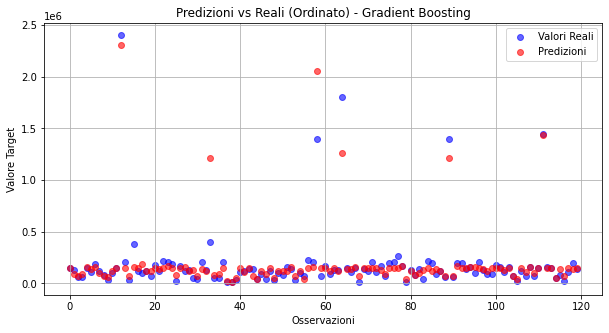

Gradient Boosting Model performance for Training set
- MAE (Mean Absolute Error): 37091.0611
- MSE (Mean Squared Error): 3451756734.4354
- RMSE (Root Mean Squared Error): 58751.6530
----------------------------------
Gradient Boosting Model performance for Test set
- MAE (Mean Absolute Error): 50545.5614
- MSE (Mean Squared Error): 13705739315.7006
- RMSE (Root Mean Squared Error): 117071.5137




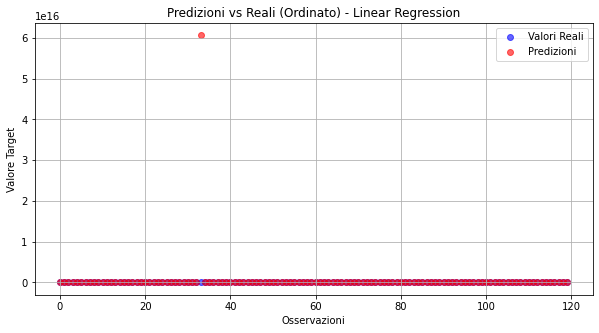

Linear Regression Model performance for Training set
- MAE (Mean Absolute Error): 68030.0651
- MSE (Mean Squared Error): 25488896889.8592
- RMSE (Root Mean Squared Error): 159652.4253
----------------------------------
Linear Regression Model performance for Test set
- MAE (Mean Absolute Error): 504861923578786.8750
- MSE (Mean Squared Error): 30586267419554293872687149219840.0000
- RMSE (Root Mean Squared Error): 5530485278847987.0000




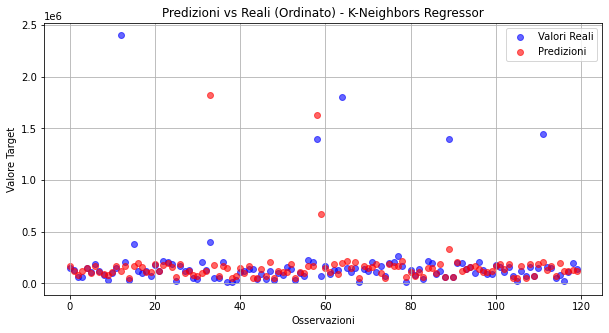

K-Neighbors Regressor Model performance for Training set
- MAE (Mean Absolute Error): 59003.5345
- MSE (Mean Squared Error): 20330615842.0602
- RMSE (Root Mean Squared Error): 142585.4686
----------------------------------
K-Neighbors Regressor Model performance for Test set
- MAE (Mean Absolute Error): 105322.3800
- MSE (Mean Squared Error): 109682583020.4560
- RMSE (Root Mean Squared Error): 331183.6092




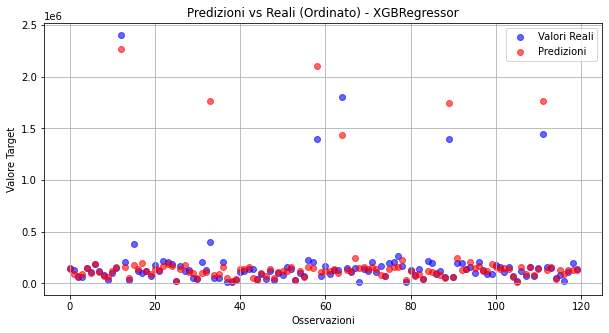

XGBRegressor Model performance for Training set
- MAE (Mean Absolute Error): 17199.2337
- MSE (Mean Squared Error): 692103951.4175
- RMSE (Root Mean Squared Error): 26307.8686
----------------------------------
XGBRegressor Model performance for Test set
- MAE (Mean Absolute Error): 57908.0520
- MSE (Mean Squared Error): 24781887758.0162
- RMSE (Root Mean Squared Error): 157422.6406




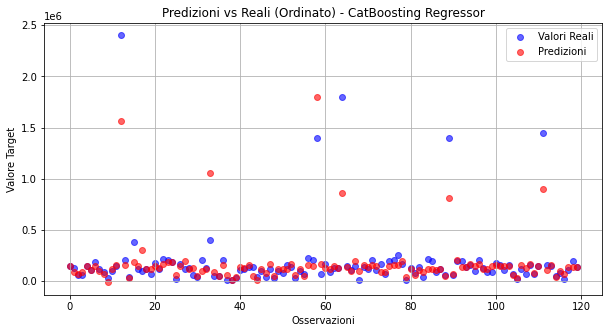

CatBoosting Regressor Model performance for Training set
- MAE (Mean Absolute Error): 25029.7716
- MSE (Mean Squared Error): 1157824887.8229
- RMSE (Root Mean Squared Error): 34026.8260
----------------------------------
CatBoosting Regressor Model performance for Test set
- MAE (Mean Absolute Error): 64920.4672
- MSE (Mean Squared Error): 25682181539.0622
- RMSE (Root Mean Squared Error): 160256.6115




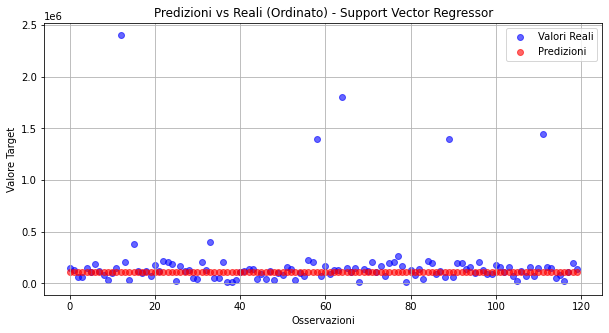

Support Vector Regressor Model performance for Training set
- MAE (Mean Absolute Error): 95352.2087
- MSE (Mean Squared Error): 82852242038.4847
- RMSE (Root Mean Squared Error): 287840.6539
----------------------------------
Support Vector Regressor Model performance for Test set
- MAE (Mean Absolute Error): 116565.6597
- MSE (Mean Squared Error): 114950400159.3776
- RMSE (Root Mean Squared Error): 339043.3603




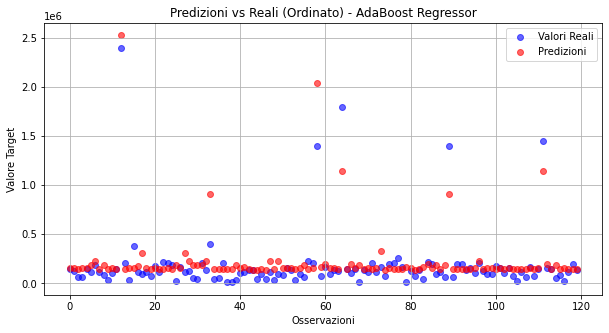

AdaBoost Regressor Model performance for Training set
- MAE (Mean Absolute Error): 80835.2449
- MSE (Mean Squared Error): 11331971805.4239
- RMSE (Root Mean Squared Error): 106451.7346
----------------------------------
AdaBoost Regressor Model performance for Test set
- MAE (Mean Absolute Error): 86350.5002
- MSE (Mean Squared Error): 18725613225.1094
- RMSE (Root Mean Squared Error): 136841.5625




In [149]:
base_model_report = evaluate_models(X=X, y=y, models=models)

In [150]:
base_model_report

,Model Name,MAE
0,Random Forest,4.923247e+04
2,Gradient Boosting,5.054556e+04
5,XGBRegressor,5.790805e+04
6,CatBoosting Regressor,6.492047e+04
1,Decision Tree,6.681185e+04
8,AdaBoost Regressor,8.635050e+04
4,K-Neighbors Regressor,1.053224e+05
7,Support Vector Regressor,1.165657e+05
3,Linear Regression,5.048619e+14


In [151]:
y_test.mean()

188341.50833333333

Try to find sub-optimal set of parameters for every model

In [156]:
from sklearn.model_selection import GridSearchCV

# Definizione dei parametri da testare per ogni modello
param_grid = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "Linear Regression": {},  # Nessun iperparametro da ottimizzare
    "K-Neighbors Regressor": {
        "n_neighbors": [3, 5, 10],
        "weights": ["uniform", "distance"]
    },
    "XGBRegressor": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "CatBoosting Regressor": {
        "iterations": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "depth": [3, 5, 7]
    },
    "Support Vector Regressor": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "AdaBoost Regressor": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}

# Dataset di esempio (sostituisci con il tuo)
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test

from sklearn.model_selection import GridSearchCV

# Dizionario per salvare i migliori modelli e le migliori performance
best_models = {}
best_scores = {}

# Ricerca dei migliori parametri per ogni modello
for name, model in models.items():
    print(f"\n🔍 Ottimizzazione per: {name}")
    
    # Se il modello non ha iperparametri (es. Linear Regression), lo usiamo direttamente
    if not param_grid[name]:
        model.fit(X_train, y_train)
        best_models[name] = model
        best_scores[name] = None  # Nessun parametro da ottimizzare
        continue
    
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grid[name], 
        scoring='neg_mean_absolute_error',  # Cambia la metrica se necessario
        cv=5, 
        n_jobs=-1, 
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Salvo il miglior modello e il miglior punteggio
    best_models[name] = grid_search.best_estimator_
    best_scores[name] = {
        "Migliori Parametri": grid_search.best_params_,
        "Miglior MAE": abs(grid_search.best_score_)  # Invertiamo il segno
    }

# 📌 Stampa finale di tutti i migliori risultati
print("\n📊 **Migliori Performance per ogni Modello** 📊")
for name, score_data in best_scores.items():
    print(f"\n🔹 {name}")
    if score_data is None:
        print("   ➤ Nessun parametro da ottimizzare")
    else:
        print(f"   ➤ Migliori Parametri: {score_data['Migliori Parametri']}")
        print(f"   ➤ Miglior MAE: {score_data['Miglior MAE']:.2f}")



🔍 Ottimizzazione per: Random Forest
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



🔍 Ottimizzazione per: Decision Tree
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



🔍 Ottimizzazione per: Gradient Boosting
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 120 out of 135 | elapsed:    3.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



🔍 Ottimizzazione per: Linear Regression

🔍 Ottimizzazione per: K-Neighbors Regressor
Fitting 5 folds for each of 6 candidates, totalling 30 fits

🔍 Ottimizzazione per: XGBRegressor
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    6.0s finished



🔍 Ottimizzazione per: CatBoosting Regressor
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   12.7s finished



🔍 Ottimizzazione per: Support Vector Regressor
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



🔍 Ottimizzazione per: AdaBoost Regressor
Fitting 5 folds for each of 9 candidates, totalling 45 fits

📊 **Migliori Performance per ogni Modello** 📊

🔹 Random Forest
   ➤ Migliori Parametri: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
   ➤ Miglior MAE: 69452.57

🔹 Decision Tree
   ➤ Migliori Parametri: {'max_depth': 10, 'min_samples_split': 10}
   ➤ Miglior MAE: 73748.63

🔹 Gradient Boosting
   ➤ Migliori Parametri: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
   ➤ Miglior MAE: 74173.92

🔹 Linear Regression
   ➤ Nessun parametro da ottimizzare

🔹 K-Neighbors Regressor
   ➤ Migliori Parametri: {'n_neighbors': 3, 'weights': 'uniform'}
   ➤ Miglior MAE: 71955.41

🔹 XGBRegressor
   ➤ Migliori Parametri: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
   ➤ Miglior MAE: 72668.69

🔹 CatBoosting Regressor
   ➤ Migliori Parametri: {'depth': 5, 'iterations': 100, 'learning_rate': 0.2}
   ➤ Miglior MAE: 66853.38

🔹 Support Vector Regressor
   ➤ Migli

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.6s finished


In [155]:
best_models

{'Random Forest': RandomForestRegressor(min_samples_split=5),
 'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_split=10),
 'Gradient Boosting': GradientBoostingRegressor(),
 'Linear Regression': LinearRegression(),
 'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=3),
 'XGBRegressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None

In [157]:
best_scores

{'Random Forest': {'Migliori Parametri': {'max_depth': 10,
   'min_samples_split': 10,
   'n_estimators': 50},
  'Miglior MAE': 69452.57486006337},
 'Decision Tree': {'Migliori Parametri': {'max_depth': 10,
   'min_samples_split': 10},
  'Miglior MAE': 73748.62808825323},
 'Gradient Boosting': {'Migliori Parametri': {'learning_rate': 0.1,
   'max_depth': 3,
   'n_estimators': 100},
  'Miglior MAE': 74173.9232774203},
 'Linear Regression': None,
 'K-Neighbors Regressor': {'Migliori Parametri': {'n_neighbors': 3,
   'weights': 'uniform'},
  'Miglior MAE': 71955.40584064329},
 'XGBRegressor': {'Migliori Parametri': {'learning_rate': 0.01,
   'max_depth': 7,
   'n_estimators': 200},
  'Miglior MAE': 72668.69168696889},
 'CatBoosting Regressor': {'Migliori Parametri': {'depth': 5,
   'iterations': 100,
   'learning_rate': 0.2},
  'Miglior MAE': 66853.38239415633},
 'Support Vector Regressor': {'Migliori Parametri': {'C': 10,
   'kernel': 'linear'},
  'Miglior MAE': 94796.84361403508},
 'Ada